<h1 align="center">Loading and Providing Datasets in PyTorch</h1>

Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Estruturar o pipeline de dados de forma que ele possa ser facilmente vinculado ao seu modelo de `aprendizado profundo` é um aspecto importante de qualquer sistema baseado em aprendizado profundo. `PyTorch` empacota tudo para fazer exatamente isso.

Enquanto no [tutorial anterior](https://machinelearningmastery.com/using-dataset-classes-in-pytorch/) usamos conjuntos de dados simples, precisaremos trabalhar com conjuntos de dados maiores em cenários do mundo real para explorar totalmente o potencial do `aprendizado profundo` e das `Redes Neurais`.

Neste script, você aprenderá como criar conjuntos de dados personalizados no `PyTorch`. Embora o foco aqui permaneça apenas nos dados de imagem, os `conceitos aprendidos nesta sessão podem ser aplicados a qualquer forma de conjunto de dados`, como texto ou conjuntos de dados tabulares. Então, aqui você vai aprender:


* Como trabalhar com conjuntos de dados de imagem pré-carregados no `PyTorch`.

* Como aplicar transformações de `torchvision` em conjuntos de dados pré-carregados.

* Como criar uma `classe` de conjunto de dados de imagem personalizada no PyTorch e aplicar várias transformações nela.

# Conjuntos de dados pré-carregados no PyTorch

Uma variedade de conjuntos de dados pré-carregados, como `CIFAR-10`, `MNIST`, `Fashion-MNIST`, etc. estão disponíveis na biblioteca de domínio `PyTorch`. Você pode importá-los do `torchvision` e realizar seus experimentos. Além disso, você pode comparar seu modelo usando esses conjuntos de dados.

Continuaremos importando o conjunto de dados `Fashion-MNIST` de torchivision. O conjunto de dados `Fashion-MNIST` inclui $70.000$ imagens em tons de cinza em $28$ × $28$ pixels, divididas em dez classes, e cada classe contém $7.000$ imagens. Existem $60.000$ imagens para treinamento e $10.000$ para teste.

Vamos começar importando algumas bibliotecas que usaremos neste tutorial.

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotilib inline

torch.manual_seed(42)


/home/eddygiusepe/17_Pytorch/Pytorch/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Vamos também definir uma função auxiliar para exibir os elementos de amostra no conjunto de dados usando `matplotlib`.

In [2]:
def imshow(sample_element, shape = (28, 28)):
    plt.imshow(sample_element[0].numpy().reshape(shape), cmap='gray')
    plt.title('Label = ' + str(sample_element[1]))
    plt.show()
    

Agora, carregaremos o conjunto de dados Fashion-MNIST, usando a função `FashionMNIST()` de `torchvision.datasets`. Esta função recebe alguns argumentos:

* `root:` especifica o caminho onde vamos armazenar nossos dados.

* `train:` indica se são dados de treino ou de teste. Vamos defini-lo como `False`, pois ainda não precisamos dele para o treinamento.

* `download:` definido como `True`, o que significa que fará o download dos dados da Internet.

* `transform:` nos permite usar qualquer uma das transformações disponíveis que precisamos aplicar em nosso conjunto de dados.

In [3]:
dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

Vamos verificar os nomes das classes junto com seus rótulos correspondentes que temos no conjunto de dados `Fashion-MNIST`.

In [4]:
classes = dataset.classes
print(classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
# Similar para as Labels:
print(dataset.class_to_idx)

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


A seguir podemos visualizar o primeiro elemento do conjunto de dados com seu rótulo correspondente usando a função auxiliar definida acima (`imshow`).

In [6]:
dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
# Forma original da primeira amostra de Dados:
dataset[0][0].shape

torch.Size([1, 28, 28])

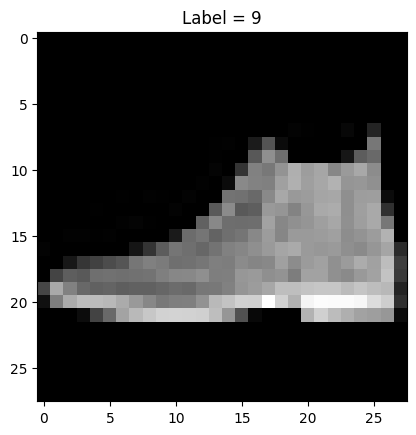

In [9]:
imshow(dataset[0])

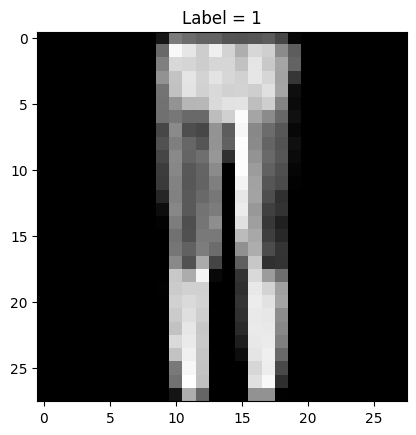

In [10]:
imshow(dataset[3])

# Aplicando transformações do Torchvision em conjuntos de dados de imagem

Em muitos casos, teremos que aplicar várias transformações antes de alimentar as imagens às `Redes Neurais`. <font color="yellow">Por exemplo:</font> muitas vezes precisaremos `RandomCrop` das imagens para aumentar os dados (`Data Augmentation`).

Como você pode ver abaixo, o `PyTorch` nos permite escolher entre uma variedade de transformações.

In [11]:
# Isso mostra todas as funções de transformação disponíveis:

print(dir(transforms))

['AugMix', 'AutoAugment', 'AutoAugmentPolicy', 'CenterCrop', 'ColorJitter', 'Compose', 'ConvertImageDtype', 'FiveCrop', 'GaussianBlur', 'Grayscale', 'InterpolationMode', 'Lambda', 'LinearTransformation', 'Normalize', 'PILToTensor', 'Pad', 'RandAugment', 'RandomAdjustSharpness', 'RandomAffine', 'RandomApply', 'RandomAutocontrast', 'RandomChoice', 'RandomCrop', 'RandomEqualize', 'RandomErasing', 'RandomGrayscale', 'RandomHorizontalFlip', 'RandomInvert', 'RandomOrder', 'RandomPerspective', 'RandomPosterize', 'RandomResizedCrop', 'RandomRotation', 'RandomSolarize', 'RandomVerticalFlip', 'Resize', 'TenCrop', 'ToPILImage', 'ToTensor', 'TrivialAugmentWide', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_pil_constants', '_presets', 'autoaugment', 'functional', 'functional_pil', 'functional_tensor', 'transforms']


Como exemplo, vamos aplicar a transformação `RandomCrop` às imagens `Fashion-MNIST` e convertê-las em um `tensor`. Podemos usar `transform.Compose` para combinar várias transformações conforme aprendemos no tutorial anterior.

In [12]:
randomcrop_totensor_transform = transforms.Compose([transforms.CenterCrop(16), transforms.ToTensor()])


dataset = datasets.FashionMNIST(root='./data',
                                train=False, download=True,
                                transform=randomcrop_totensor_transform)

print("shape of the first data sample: ", dataset[0][0].shape)

shape of the first data sample:  torch.Size([1, 16, 16])


Como você pode ver, a imagem agora foi cortada (`cropped`) para `16` x `16` píxeis. Agora, vamos plotar o primeiro elemento do conjunto de dados para ver como eles foram cortados aleatoriamente.

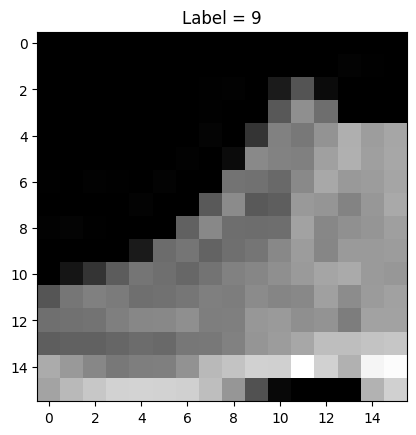

In [13]:
imshow(dataset[0], shape=(16, 16))

Juntando tudo, o código completo é o seguinte:

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


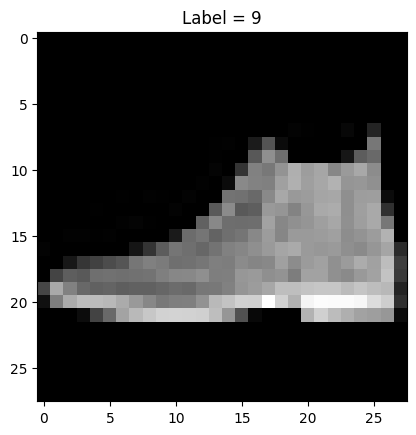

shape of the first data sample:  torch.Size([1, 16, 16])


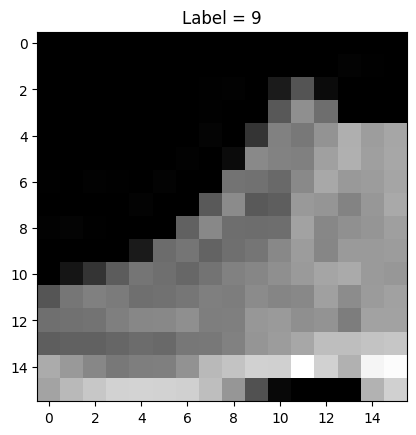

In [15]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(42)
 
def imshow(sample_element, shape = (28, 28)):
    plt.imshow(sample_element[0].numpy().reshape(shape), cmap='gray')
    plt.title('Label = ' + str(sample_element[1]))
    plt.show()
 
dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
 
classes = dataset.classes
print(classes)
print(dataset.class_to_idx)
 
imshow(dataset[0])
 
randomcrop_totensor_transform = transforms.Compose([transforms.CenterCrop(16),
                                                    transforms.ToTensor()])
dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=randomcrop_totensor_transform)

 
print("shape of the first data sample: ", dataset[0][0].shape)
imshow(dataset[0], shape=(16, 16))

# <font color='red'>Como criar conjuntos de dados de imagens personalizados</font>

`Até agora, discutimos conjuntos de dados pré-construídos no PyTorch`, mas e se tivermos que criar uma classe de conjunto de dados personalizada para nosso conjunto de dados de imagem? Enquanto no [tutorial anterior](https://machinelearningmastery.com/using-dataset-classes-in-pytorch/) tivemos apenas uma visão geral simples sobre os componentes da classe `Dataset`, <font color="orange">aqui criaremos uma classe de conjunto de dados de imagem personalizada a partir do zero</font>.


`Primeiramente`, no construtor definimos os parâmetros da classe. A função `__init__` na classe instancia o objeto `Dataset`. O diretório onde as imagens e anotações são armazenadas é inicializado junto com as transformações se quisermos aplicá-las em nosso conjunto de dados posteriormente. Aqui assumimos que temos algumas imagens em uma estrutura de diretório como a seguinte:

```
attface/
|-- imagedata.csv
|-- s1/
|   |-- 1.png
|   |-- 2.png
|   |-- 3.png
|   ...
|-- s2/
|   |-- 1.png
|   |-- 2.png
|   |-- 3.png
|   ...
...
```

e a anotação é um arquivo `CSV` como o seguinte, localizado no diretório raiz das imagens (ou seja, `"attface"` acima):

```
s1/1.png,1
s1/2.png,1
s1/3.png,1
...
s12/1.png,12
s12/2.png,12
s12/3.png,12
```

onde a primeira coluna dos dados `CSV` é o caminho para a imagem e a segunda coluna é o rótulo.

Da mesma forma, definimos a função `__len__` na classe que retorna o número total de amostras em nosso dataset de imagem enquanto o método `__getitem__` lê e retorna um elemento do dataset em um determinado índice.



In [16]:
import os
import pandas as pd
import numpy as np
from torchvision.io import read_image
 
# creating object for our image dataset
class CustomDatasetForImages(Dataset):
    # defining constructor
    def __init__(self, annotations, directory, transform=None):
        # directory containing the images
        self.directory = directory
        annotations_file_dir = os.path.join(self.directory, annotations)
        # loading the csv with info about images
        self.labels = pd.read_csv(annotations_file_dir)
        # transform to be applied on images
        self.transform = transform
 
        # Number of images in dataset
        self.len = self.labels.shape[0]
 
    # getting the length
    def __len__(self):
        return len(self.labels)
 
    # getting the data items
    def __getitem__(self, idx):
        # defining the image path
        image_path = os.path.join(self.directory, self.labels.iloc[idx, 0])
        # reading the images
        image = read_image(image_path)
        # corresponding class labels of the images 
        label = self.labels.iloc[idx, 1]
 
        # apply the transform if not set to None
        if self.transform:
            image = self.transform(image)
        
        # returning the image and label
        return image, label

Agora, podemos criar nosso objeto de conjunto de dados e aplicar as transformações nele. Assumimos que os dados da imagem estão localizados no diretório chamado `"attface"` e o arquivo `CSV` de anotação está em `"attface/imagedata.csv"`. Em seguida, o conjunto de dados é criado da seguinte forma:

In [ ]:
directory = "attface"
annotations = "imagedata.csv"
custom_dataset = CustomDatasetForImages(annotations=annotations, directory=directory)


Opcionalmente, você também pode adicionar a função de transformação ao conjunto de dados:

In [ ]:
randomcrop_totensor_transform = transforms.RandomCrop(16)

dataset = CustomDatasetForImages(annotations=annotations,
                                 directory=directory,
                                 transform=randomcrop_totensor_transform)

<font color="orange">Você pode usar essa classe de conjunto de dados de imagem personalizada para qualquer um dos seus conjuntos de dados armazenados em seu diretório e aplicar as transformações para seus requisitos.</font>